# Experiments

A way to generate test multiple methods on multiple datasets and view the results in a grid.

In [1]:
from drnb.experiment import Experiment

In [2]:
experiment = Experiment(
    name="pca-vs-randproj",
    evaluations=["rte"],
    # evaluations=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
)

In [3]:
experiment.add_method("pca")
experiment.add_method("randproj")

In [4]:
experiment.add_datasets(["iris", "s1k", "mnist"])

To run the experiment, call the `run` method.

Experiments save results into the results folder which is `$DRNB_HOME/experiments` as they go. In
the event of disaster there is some checkpointing, so you may be able to pick up from where you
left off.

In [5]:
experiment.run()

[22:00:25] INFO     Experiment pca-vs-randproj writing to                          ]8;id=246769;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=667348;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#231\231]8;;\
                    /home/james/rdev/datasets/experiments/pca-vs-randproj                           

[22:00:29] INFO     Running pca on iris                                            ]8;id=131802;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=186502;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

[22:00:30] INFO     Running pca on s1k                                             ]8;id=172009;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=184432;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

           INFO     Running pca on mnist                                           ]8;id=173693;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=596355;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

[22:00:32] INFO     Running randproj on iris                                       ]8;id=248176;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=474362;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

[22:00:33] INFO     Running randproj on s1k                                        ]8;id=865352;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=612057;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

           INFO     Running randproj on mnist                                      ]8;id=538460;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=76334;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

When plotting the results, the coordinates will be rigid-body aligned (and optionally reflected) to
minimize the RMSD deviation from the first result for each method so that the plots are in the same
frame of reference to the greatest possible extent. No stretching of the axes is done however.

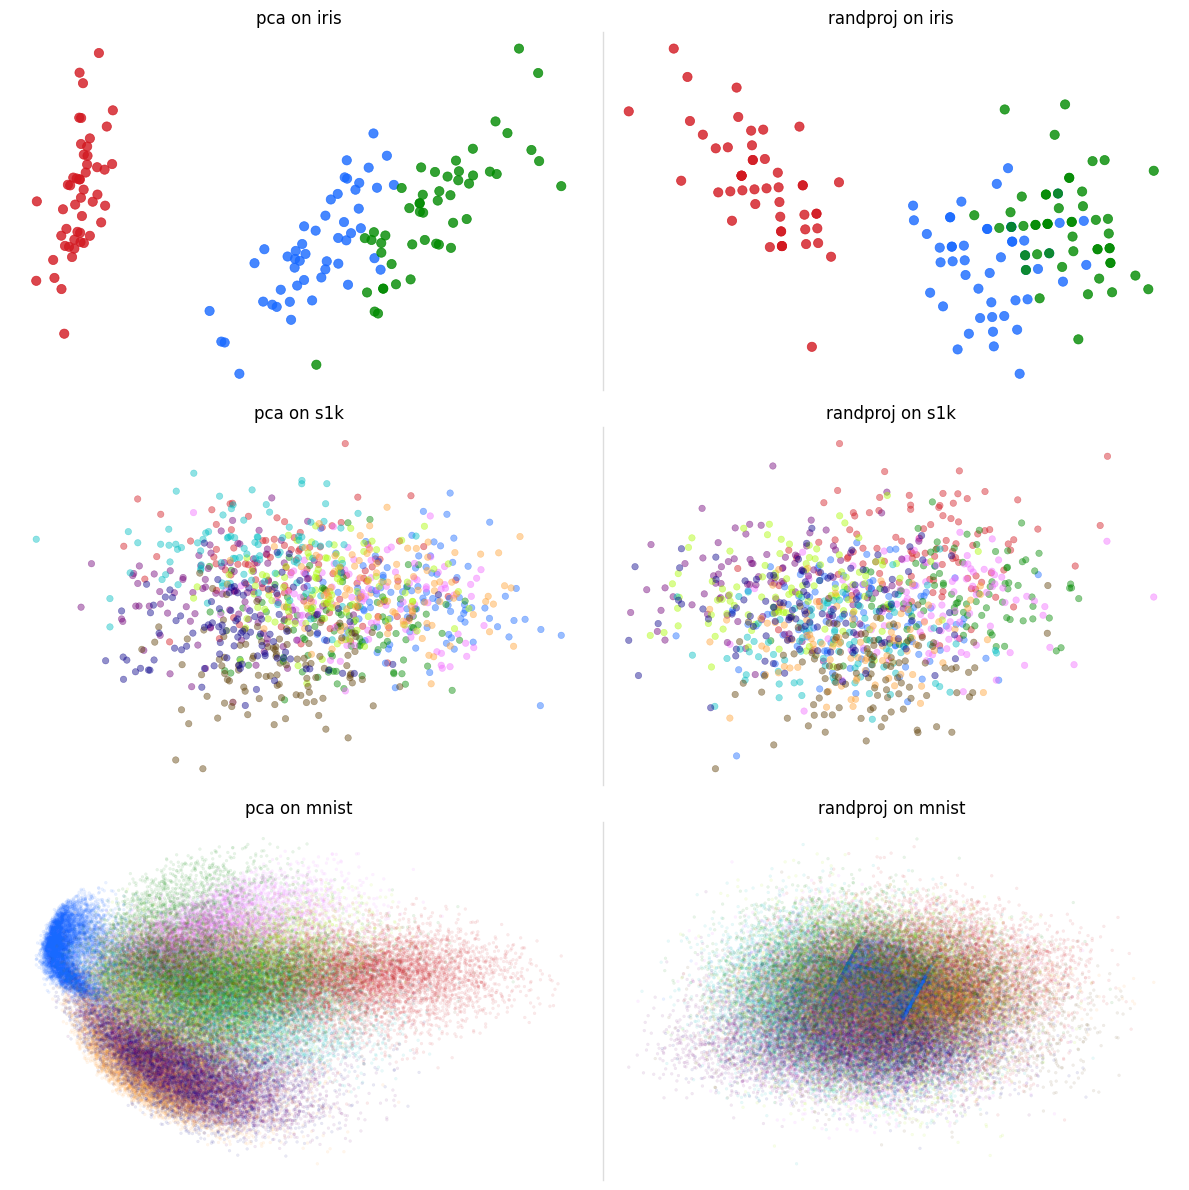

In [6]:
experiment.plot()

The result of the evaluations can be viewed in a dataframe with the `to_df` method:

In [ ]:
experiment.to_df()

method,pca,randproj
metric,rte-5,rte-5
s1k,0.662,0.638
mnist,0.671337,0.570751
iris,0.978667,0.762667


To prove the point about a failed run, we can clear the result for the `pca` method on the `iris`
dataset with `clear_task` and rerun it.

In [7]:
experiment.clear_task("pca", "iris")

In [8]:
experiment.run()

[22:00:48] INFO     Experiment pca-vs-randproj writing to                          ]8;id=634582;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=480409;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#231\231]8;;\
                    /home/james/rdev/datasets/experiments/pca-vs-randproj                           

           INFO     Running pca on iris                                            ]8;id=335219;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=814607;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#270\270]8;;\

           INFO     Skipping pca on s1k (already completed, matching signature)    ]8;id=323696;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=476350;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#252\252]8;;\

           INFO     Skipping pca on mnist (already completed, matching signature)  ]8;id=604165;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=923744;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#252\252]8;;\

           INFO     Skipping randproj on iris (already completed, matching         ]8;id=667898;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=497294;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#252\252]8;;\
                    signature)                                                                      

           INFO     Skipping randproj on s1k (already completed, matching          ]8;id=657328;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=585809;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#252\252]8;;\
                    signature)                                                                      

           INFO     Skipping randproj on mnist (already completed, matching        ]8;id=917570;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=43097;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#252\252]8;;\
                    signature)                                                                      

Only the `pca/iris` run is executed. There's not much general use for `clear_task` except if
something went really weird with the output, but the checkpointing thought it finished correctly.

           INFO     Reading experiment pca-vs-randproj from                        ]8;id=305257;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py\experiment.py]8;;\:]8;id=744492;file:///home/james/dev/drnb-plugin/src/drnb/experiment.py#630\630]8;;\
                    /home/james/rdev/datasets/experiments/pca-vs-randproj                           

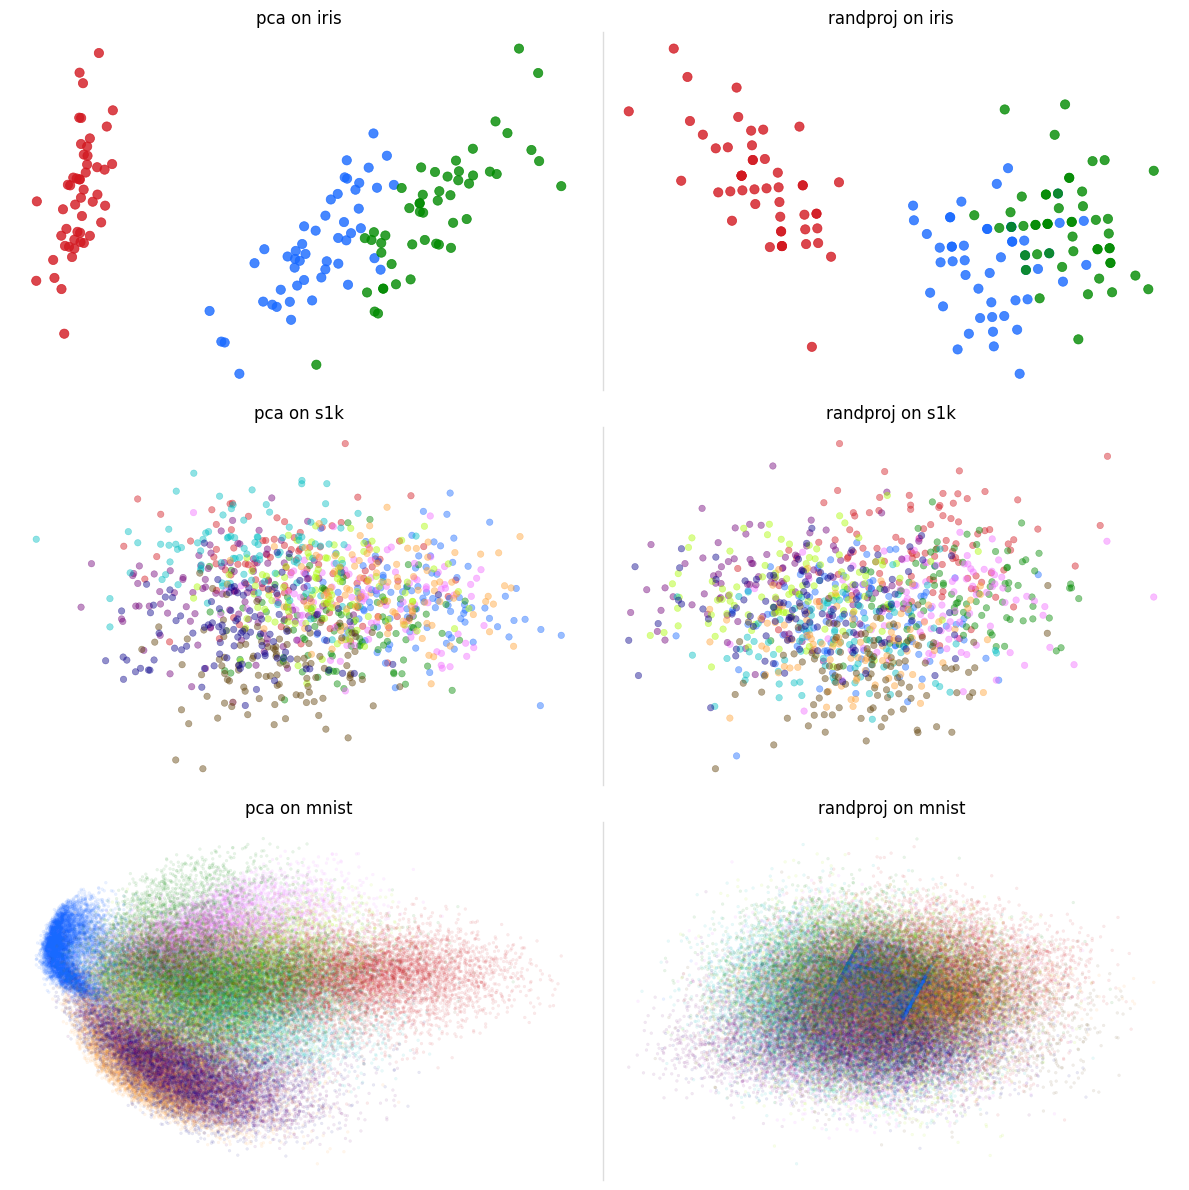

In [9]:
from drnb.experiment import read_experiment

exp = read_experiment("pca-vs-randproj")
exp.plot()